In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the Train file

In [2]:
df = pd.read_csv('train.csv');df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(4209, 378)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
# We have 369 intiger columns and 8 object columns

# Checking columns with object dtype

In [6]:
categorical_cols = df.select_dtypes('object')

In [7]:
categorical_cols.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
5,t,b,e,c,d,g,h,s
6,al,r,e,f,d,f,h,s
7,o,l,as,f,d,f,j,a
8,w,s,as,e,d,f,i,h
9,j,b,aq,c,d,f,a,e


In [8]:
# Checking unique number of variables in each categorical columns

In [9]:
for i in categorical_cols:
    uni = categorical_cols[i].nunique()
    print(f"Column '{i}' has '{uni}' number of unique variables.")

Column 'X0' has '47' number of unique variables.
Column 'X1' has '27' number of unique variables.
Column 'X2' has '44' number of unique variables.
Column 'X3' has '7' number of unique variables.
Column 'X4' has '4' number of unique variables.
Column 'X5' has '29' number of unique variables.
Column 'X6' has '12' number of unique variables.
Column 'X8' has '25' number of unique variables.


# 1. Checking Variance

In [10]:
varience = df.var()

In [11]:
list(varience[varience == 0].index)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [12]:
# List of columns having varience = 0 (we will drop it)

# 2. Checing Null Value

In [13]:
null_df_col = [i for i in df if df[i].isna().sum()]

In [14]:
null_df_col

[]

In [15]:
# No null Value

In [16]:
# Dropping data with object dtype in dataframe 'df' and with varience = 0 and ID column

In [17]:
df_drop = df.drop(df.select_dtypes(object),axis = 1, inplace=True)

In [18]:
df_drop = df.drop(['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347','ID'],axis=1, inplace=True)

In [19]:
df.shape

(4209, 357)

# 3. Performing Label Encoding on data

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [22]:
df1 = categorical_cols.apply(le.fit_transform)

In [23]:
df1.shape

(4209, 8)

In [24]:
df1.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
5,40,3,25,2,3,11,7,18
6,9,19,25,5,3,10,7,18
7,36,13,16,5,3,10,9,0
8,43,20,16,4,3,10,8,7
9,31,3,14,2,3,10,0,4


In [25]:
df_final = pd.concat([df,df1],axis = 1)

In [26]:
df_final.shape

(4209, 365)

In [27]:
df_final.head(10)

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,32,23,17,0,3,24,9,14
1,88.53,0,0,0,0,0,0,0,1,0,...,0,0,32,21,19,4,3,28,11,14
2,76.26,0,0,0,0,0,0,1,0,0,...,0,0,20,24,34,2,3,27,9,23
3,80.62,0,0,0,0,0,0,0,0,0,...,0,0,20,21,34,5,3,27,11,4
4,78.02,0,0,0,0,0,0,0,0,0,...,0,0,20,23,34,5,3,12,3,13
5,92.93,0,0,0,1,0,0,0,0,0,...,0,0,40,3,25,2,3,11,7,18
6,128.76,0,0,0,1,0,0,0,0,0,...,0,0,9,19,25,5,3,10,7,18
7,91.91,0,0,0,1,0,0,0,0,0,...,0,0,36,13,16,5,3,10,9,0
8,108.67,0,0,0,1,0,0,0,0,0,...,0,0,43,20,16,4,3,10,8,7
9,126.99,0,0,0,1,0,0,0,0,0,...,0,0,31,3,14,2,3,10,0,4


In [28]:
# Seperating Target and Features

In [29]:
target = df_final['y']

In [30]:
feature = df_final.drop('y',axis=1)

In [31]:
print(feature.shape)
print(target.shape)

(4209, 364)
(4209,)


In [32]:
# train test split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size= 0.50,random_state=2020)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2104, 364)
(2105, 364)
(2104,)
(2105,)


In [36]:
# Performing standard scaler on features

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
ss = StandardScaler()

In [39]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

In [40]:
feature_std = ss.transform(feature)

In [41]:
feature_std

array([[-0.12228725, -0.28688766,  3.91280942, ...,  1.30377284,
         0.73962206,  0.33567352],
       [-0.12228725, -0.28688766, -0.25557084, ...,  1.78919808,
         1.41902168,  0.33567352],
       [-0.12228725, -0.28688766, -0.25557084, ...,  1.66784177,
         0.73962206,  1.61744683],
       ...,
       [-0.12228725,  3.48568501,  3.91280942, ..., -1.60877863,
        -0.27947736, -1.08851904],
       [-0.12228725, -0.28688766, -0.25557084, ..., -1.60877863,
         1.41902168,  1.19018906],
       [-0.12228725, -0.28688766, -0.25557084, ..., -1.60877863,
        -0.27947736,  1.47502757]])

# 4. Performing Dimensionality reduction

In [42]:
from sklearn.decomposition import PCA 

In [43]:
sklearn_pca = PCA()

In [44]:
pca_data = sklearn_pca.fit(feature_std)

In [45]:
varience_percentage = sklearn_pca.explained_variance_ratio_
#PCA1 =15%,PCA2=12%,PCA3=11%,nnn,PCA= 1% {total 100}

cum_var_per = sklearn_pca.explained_variance_ratio_.cumsum()

Text(0, 0.5, 'Varience')

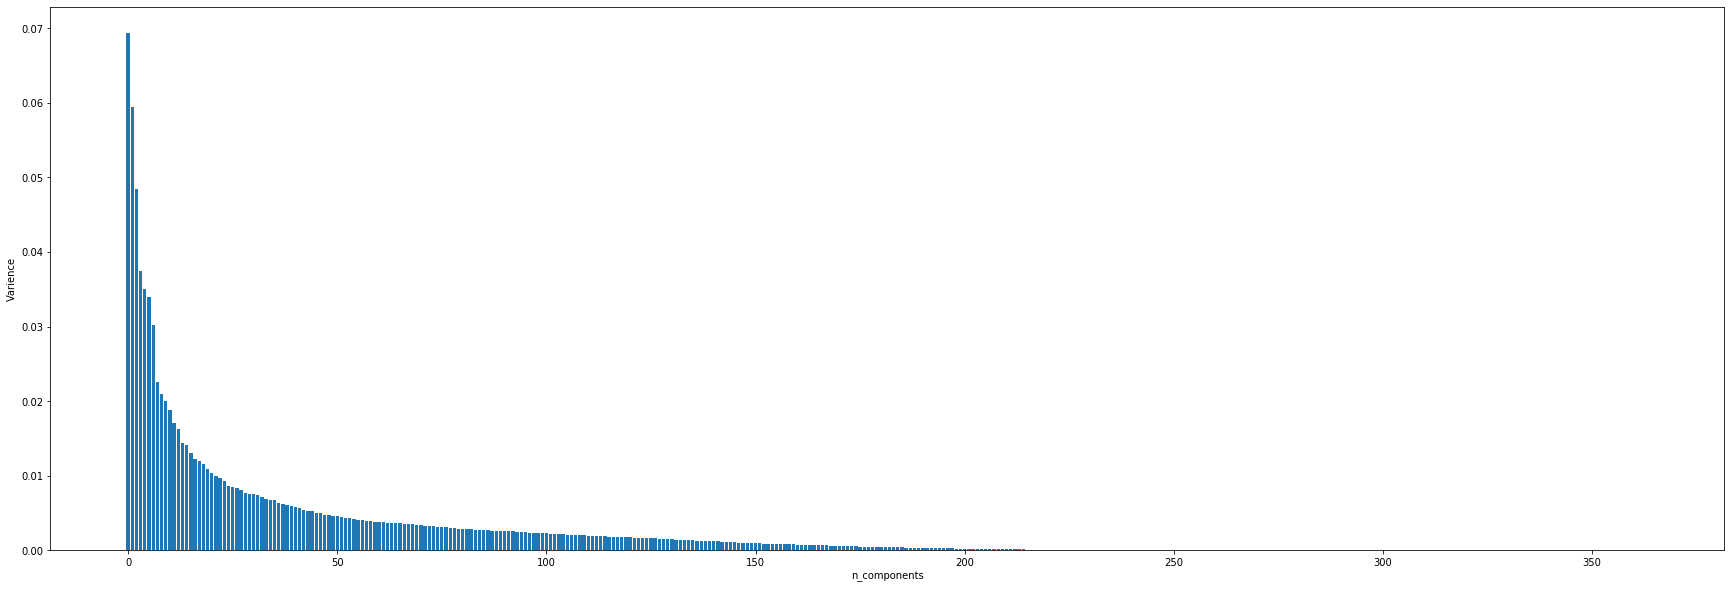

In [46]:
plt.figure(figsize=(30,10))
ind = np.arange(len(varience_percentage))
plt.bar(ind,varience_percentage)
plt.xlabel('n_components')
plt.ylabel('Varience')

#explained varience ratio

In [47]:
cum_var_per[200]

0.9960958290311095

In [48]:
len(cum_var_per[cum_var_per <0.95])

134

In [49]:
pca_final = PCA(n_components=len(cum_var_per[cum_var_per <0.95]));pca_final

PCA(copy=True, iterated_power='auto', n_components=134, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [50]:
pca = PCA(n_components=134)
post_pca_array = pca.fit_transform(feature_std)

In [51]:
print(post_pca_array.shape)

(4209, 134)


In [52]:
feature_after_pca = pd.DataFrame(post_pca_array)

In [53]:
feature_after_pca

,0,1,2,3,4,5,6,7,8,9,...,124,125,126,127,128,129,130,131,132,133
0,10.746225,-3.455537,-0.793121,0.068544,-2.232065,0.477892,5.572091,-3.911093,6.758393,1.905379,...,-0.344881,0.772592,0.163252,-1.555681,-0.136011,-0.056782,0.515546,-0.036243,-0.916256,1.055493
1,-0.201149,0.357125,0.883888,-0.069161,-2.300316,-1.559918,1.136103,-0.550770,-0.065570,-0.386967,...,0.284965,2.193402,0.879593,3.351382,-1.182489,0.758024,-0.306318,2.250320,-0.647693,0.724166
2,11.204988,18.974130,-4.843041,-1.744466,4.241507,-1.546368,1.220656,3.205451,1.501229,-0.064395,...,-0.556464,1.323816,1.758520,-0.398643,-0.510232,0.581468,3.583120,1.050410,2.233012,-0.045407
3,8.143955,18.768998,-5.495033,1.426648,1.464994,0.681649,0.333393,-0.068734,0.720004,-0.142418,...,-1.675976,1.156666,0.864441,-0.038246,0.050565,0.636481,0.975350,0.016809,-0.230505,0.460436
4,7.698452,19.948997,-6.445415,1.748350,0.783151,1.276739,-1.070705,-0.133553,-0.536082,0.523125,...,-0.154248,0.330632,-0.173791,0.513299,0.259419,0.199498,-0.010553,0.136192,0.107655,-0.184807
5,-2.259440,-2.024663,-3.888042,0.602826,2.313465,1.566058,0.328903,-1.075541,-1.146216,0.385844,...,0.381016,-0.124894,0.017228,-0.437831,-0.386377,0.133574,0.548425,-0.110425,0.109722,0.241161
6,-1.534012,1.154099,0.442650,2.279286,-4.184173,-0.943612,-3.648597,-1.852368,1.097732,0.141269,...,-0.436299,-0.674547,1.589001,0.092498,0.077861,-0.647173,-0.352139,0.305419,-0.072380,0.395606
7,-1.775195,0.889217,5.141170,-1.246758,-0.552238,-0.435238,-0.916323,-0.036090,-0.951573,-0.366516,...,0.066720,-0.254291,0.818709,0.407431,0.082215,0.209755,0.477596,-0.259518,-0.504294,0.399812
8,-0.709658,0.822263,5.118897,-4.217276,0.940150,-1.354328,1.521971,3.180786,0.257994,-0.196699,...,-0.625587,-0.013777,0.812291,0.400007,-0.952939,-0.704045,-0.283053,-0.571162,-0.343854,-0.417963
9,-1.167748,-2.485034,-3.450640,-1.205820,4.004605,1.108217,1.440718,-1.099531,0.030144,0.610002,...,0.758683,-0.232532,0.258196,1.039243,0.225592,-0.474474,-0.611872,0.256192,-0.584502,0.154897


In [54]:
X_train,X_test,y_train,y_test = train_test_split(feature_after_pca,target,test_size=0.3,random_state=33)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(2946, 134)
(1263, 134)
(1263,)


# 5. Model Building

In [56]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [57]:
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 5.948 (0.344)


In [58]:
model.fit(X_train,y_train)

[23:32:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/samridhi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
y_train_predicted = model.predict(X_train) # X train
y_test_predict = model.predict(X_test)

In [60]:
model.score(X_train,y_train)

0.69333490763659

In [61]:
model.score(X_test,y_test)

0.45497104670929595

In [62]:
df_pred = pd.DataFrame({
    'Actual':y_test,
    'Predictions':y_test_predict
})
df_pred['Predictions']= round(df_pred['Predictions'])
df_pred.tail()

,Actual,Predictions
1283,89.85,96.0
674,118.17,113.0
3562,110.36,111.0
596,90.76,94.0
741,118.27,105.0


# Model has 69% accuracy score

# Working on Test Data

In [63]:
data_test = pd.read_csv('test.csv')

In [64]:
data_test.shape

(4209, 377)

In [65]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [66]:
data_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
categorical_cols = data_test.select_dtypes(object)

In [68]:
categorical_cols.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8
0,az,v,n,f,d,t,a,w
1,t,b,ai,a,d,b,g,y
2,az,v,as,f,d,a,j,j
3,az,l,n,f,d,z,l,n
4,w,s,as,c,d,y,i,m
5,y,aa,ai,e,d,x,g,s
6,x,b,ae,d,d,x,d,y
7,f,s,ae,c,d,h,d,a
8,ap,l,s,c,d,h,j,n
9,o,v,as,f,d,g,f,v


In [69]:
for i in categorical_cols:
    uni = categorical_cols[i].nunique()
    print(f"Column '{i}' has '{uni}' number of unique variables.")

Column 'X0' has '49' number of unique variables.
Column 'X1' has '27' number of unique variables.
Column 'X2' has '45' number of unique variables.
Column 'X3' has '7' number of unique variables.
Column 'X4' has '4' number of unique variables.
Column 'X5' has '32' number of unique variables.
Column 'X6' has '12' number of unique variables.
Column 'X8' has '25' number of unique variables.


In [70]:
varience = data_test.var()
list(varience[varience == 0].index)
null_df_col = [i for i in data_test if data_test[i].isna().sum()]
null_df_col

[]

In [71]:
df_drop = data_test.drop(data_test.select_dtypes(object),axis = 1, inplace=True)
df_drop = data_test.drop(['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347','ID'],axis=1, inplace=True)

In [72]:
data_test.shape

(4209, 356)

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
df2 = categorical_cols.apply(le.fit_transform)
df2.head(10)

,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12
5,47,1,8,4,3,29,6,18
6,46,3,4,3,3,29,3,24
7,29,20,4,2,3,14,3,0
8,12,13,38,2,3,14,9,13
9,38,23,17,5,3,13,5,21


In [75]:
df_final2 = pd.concat([data_test,df2],axis = 1)
df_final2.head(10)


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X384,X385,X0,X1,X2,X3,X4,X5,X6,X8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,21,23,34,5,3,26,0,22
1,0,0,0,0,0,0,0,0,1,0,...,0,0,42,3,8,0,3,9,6,24
2,0,0,0,1,0,0,0,0,0,0,...,0,0,21,23,17,5,3,0,9,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,21,13,34,5,3,31,11,13
4,0,0,0,1,0,0,0,0,0,0,...,0,0,45,20,17,2,3,30,8,12
5,0,0,0,0,0,0,0,0,1,0,...,0,0,47,1,8,4,3,29,6,18
6,0,0,0,0,0,0,0,0,0,1,...,0,0,46,3,4,3,3,29,3,24
7,0,0,1,0,0,0,0,0,0,1,...,0,0,29,20,4,2,3,14,3,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,12,13,38,2,3,14,9,13
9,0,0,0,1,0,0,0,0,0,0,...,0,0,38,23,17,5,3,13,5,21


In [76]:
model.fit(df_final2,target)

/Users/samridhi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/samridhi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[23:32:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [77]:
y_preds = model.predict(df_final2)

In [78]:
predicted_y = pd.DataFrame(y_preds)

In [79]:
predicted_y

,0
0,101.026802
1,100.370804
2,87.973701
3,91.007935
4,88.708488
5,98.363129
6,100.736557
7,98.919151
8,101.066040
9,101.016808
